In [2]:

from pandas import read_csv

cs =read_csv('haberman.csv')

# pdf (histogram)
'''
findings

Age - age of the patient
Op_year - year of the operation
axil_nodes - number of positive axillary nodes detected
Surv_status - survival status 
    1 means the patient survived 5 years or longer
    2 means the patient died within 5 year
'''

print(cs.head())
print(cs.tail())
print(cs.describe())

   Age  Op_year  axil_nodes  Surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1
     Age  Op_year  axil_nodes  Surv_status
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1
304   78       65           1            2
305   83       58           2            2
              Age     Op_year  axil_nodes  Surv_status
count  306.000000  306.000000  306.000000   306.000000
mean    52.457516   62.852941    4.026144     1.264706
std     10.803452    3.249405    7.189654     0.441899
min     30.000000   58.000000    0.000000     1.000000
25%     44.000000   60.000000    0.000000     1.000000
50%     52.000000   63.000000    1.000000     1.000000
75%     60.750000   65.750000    4.000000     2.000000
max     83.000000   69.000000   52.000000     2.000000


'\nAge: more than 75% of servivers are aged below 60\nOp_year: most operations were done in year 58\nSurv_status: most of the survivers (~70%) lived 5 years or longer\naxil_node: most of the survivers have 0 axil nodes count,\nand around 75-80 % survivers have axil node less than 10 axil nodes count\n'

<Figure size 432x288 with 0 Axes>

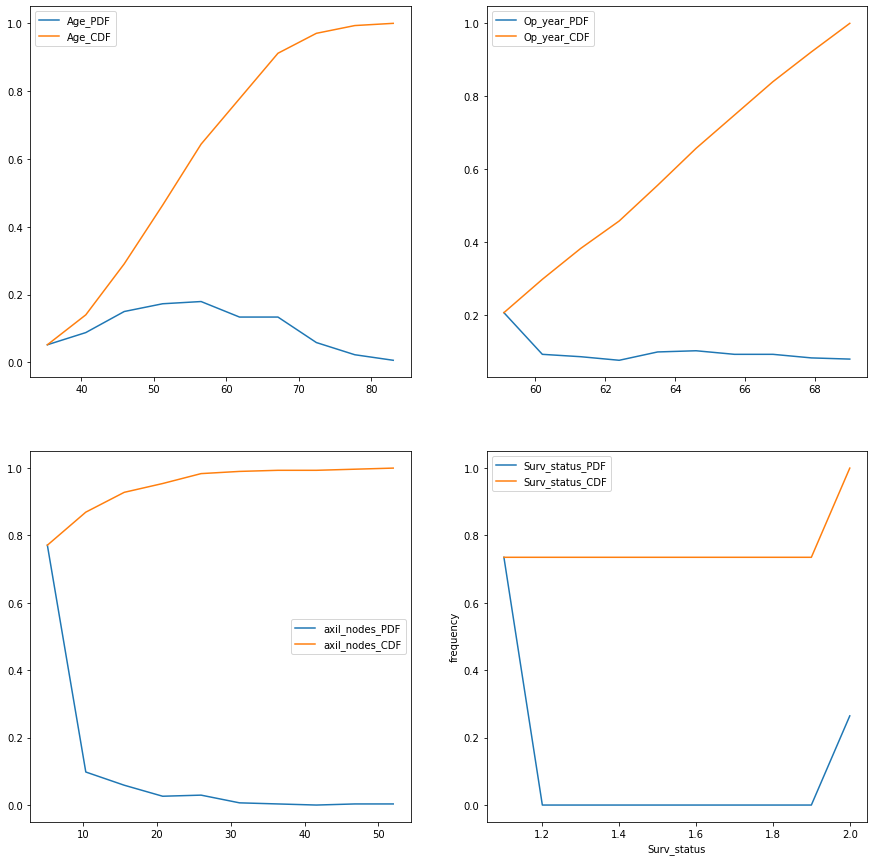

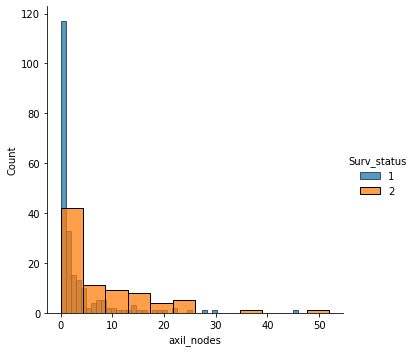

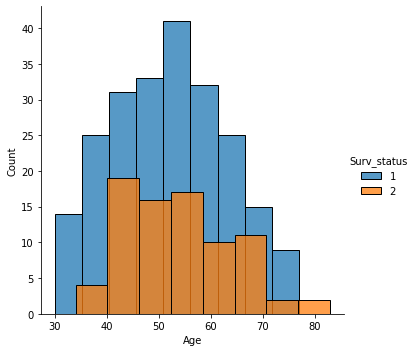

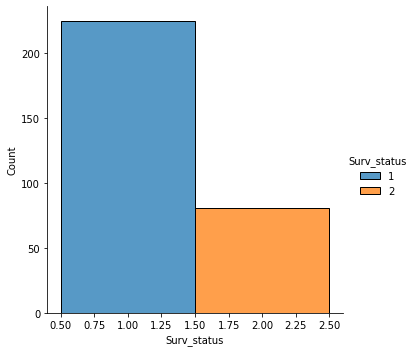

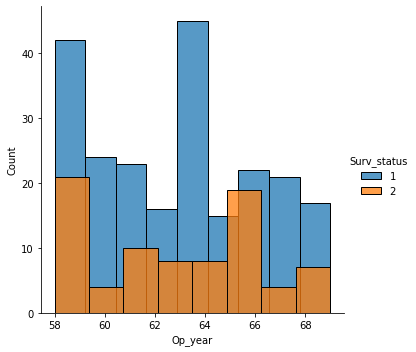

In [7]:
# histogram of each feature

import seaborn as sns
from matplotlib import pyplot
from math import floor, ceil
import numpy

# print(numpy.histogram(cs))

def getPlotPlacement(count, fig):
    tmp = count**0.5
    r = floor(tmp)
    c = ceil(tmp)
    ax = fig.subplots(nrows = r, ncols = c)
    for i in range(r):
        for j in range(c):
            yield ax[i,j]

fig = pyplot.figure(1, figsize=(15, 15))
placement = getPlotPlacement(len(cs.columns), fig)
   
for j,i in enumerate(cs.columns):
    counts,weights = numpy.histogram(cs[i], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = numpy.cumsum(pdf)
    place = next(placement)
    pyplot.xlabel(i)
    pyplot.ylabel('frequency')
    place.plot(weights[1:], pdf, label=i+'_PDF')
    place.plot(weights[1:], cdf, label=i+'_CDF')
    place.legend()

# print(cs.columns)
for j,i in enumerate(cs.columns):
    # sns.FacetGrid(cs, hue=i, height=5).map(sns.histplot, i).add_legend()
    sns.FacetGrid(cs, hue='Surv_status', height=5).map(sns.histplot, i).add_legend()
    # sns.FacetGrid(cs, hue=i, height=5).map(sns.histplot, i)
    pyplot.figure(j)

'''
Age: more than 75% of servivers are aged below 60
Op_year: most operations were done in year 58
Surv_status: most of the survivers (~70%) lived 5 years or longer
axil_node: most of the survivers have 0 axil nodes count,
and around 75-80 % survivers have axil node less than 10 axil nodes count
'''


'\naxilnode count deviates too far from median value\n'

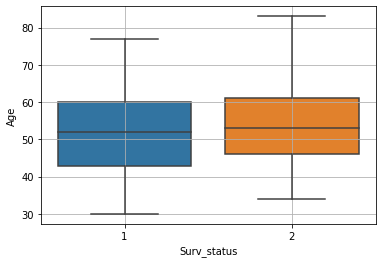

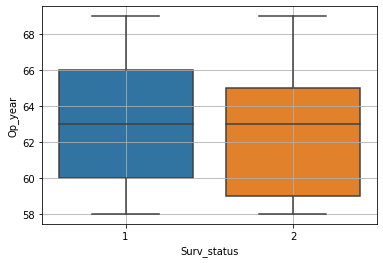

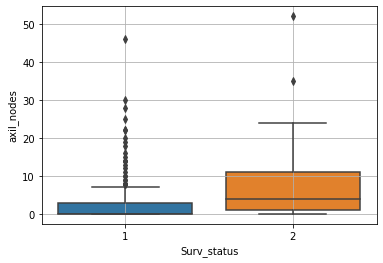

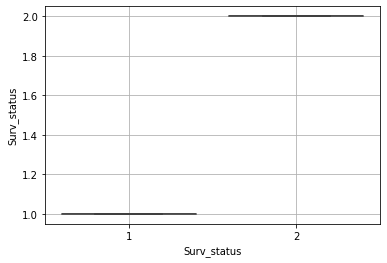

In [5]:
# boxplot
from matplotlib import pyplot

for j,i in enumerate(cs.columns):
    pyplot.figure(j)
    # sns.boxplot(data =cs, x=None, y=i)
    sns.boxplot(data =cs, x='Surv_status', y=i)
    pyplot.grid()
    pyplot.plot()

'''
axilnode count deviates too far from median value
'''

'\n\n'

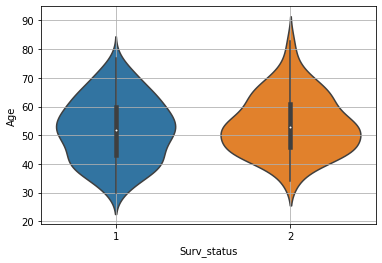

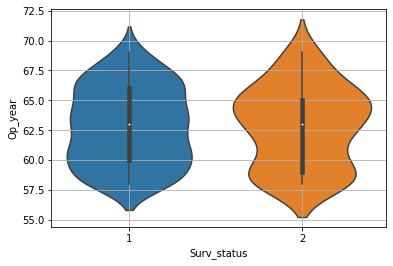

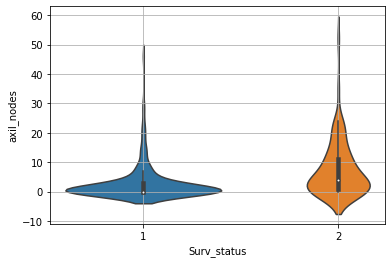

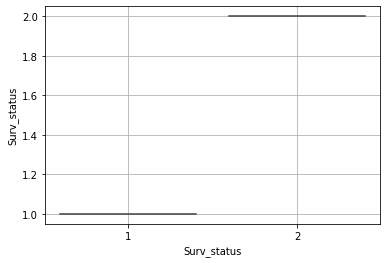

In [6]:
#violinplot

from matplotlib import pyplot

for j,i in enumerate(cs.columns):
    pyplot.figure(j)
    # sns.violinplot(data = cs, x=None, y=i, size=5)
    sns.violinplot(data = cs, x='Surv_status', y=i, size=5)
    pyplot.grid()
    pyplot.plot()

'''
most of the patient has survived more thant 5 years if axil node count is ~0
'''